## Регрессия

С 1ого октября отменяется НДС на бриллианты, теперь они становятся новым инвестиционным инструментом. Давайте сделаем модель ценообразования для них.



**Описание полей**


* fluor - флуорисценуия (свойство камня светиться в лучах ультр)
* symmetry - показатель симметричности
* platform - название платформы, где был размещен камень
* quality_group - составной показатель из cut polish symmetry
* size_group - каратно весовая группа
* big_size_group - каратно-весовая группа
* shape - форма
* color - цвет
* clarity - чистота
* cut - качество огранки (может быть только у круглых камней)
* polish - полировка
* id - номер камня
* date - дата
* price - цена
* carat - кол-во карат
* tablepercent - размер площадки по отношению ширине
* price_per_carat - цена за карат
* z - длина (diameter)
* x - ширина
* depth_perc - отношение высоты к ширине
* y - высота



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\dm199\Downloads\diamonds - diamonds.csv", index_col=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222222 entries, 135269 to 310690
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fluor            222207 non-null  object 
 1   symmetry         222218 non-null  object 
 2   platform         222218 non-null  object 
 3   shape            222218 non-null  object 
 4   color            222218 non-null  object 
 5   clarity          222218 non-null  object 
 6   cut              148981 non-null  object 
 7   polish           222218 non-null  object 
 8   id               222222 non-null  int64  
 9   date             222222 non-null  int64  
 10  price            222222 non-null  float64
 11  carat            222222 non-null  float64
 12  price_per_carat  222222 non-null  float64
 13  z                222222 non-null  float64
 14  x                222222 non-null  float64
 15  depth_perc       222222 non-null  float64
 16  y                222222 non-null 

In [3]:
df

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
135269,NONE,EX,jamesallen,PS,F,SI1,NaN,EX,13870838,202206,12850.0,1.55,8290.32,10.29,6.41,62.0,3.97420
48477,MED,EX,jamesallen,RD,H,VVS2,EX,EX,11725253,202207,7510.0,1.02,7362.75,6.41,6.45,62.5,4.03125
236786,NONE,EX,jamesallen,EM,H,IF,NaN,EX,14444347,202205,21220.0,2.01,10557.21,8.60,6.37,65.0,4.14050
235781,NONE,EX,jamesallen,RD,E,VS2,EX,EX,14438434,202207,8660.0,1.00,8660.00,6.39,6.44,61.4,3.95416
277744,NONE,VG,jamesallen,RD,F,VS1,VG,EX,14615276,202206,8480.0,1.00,8480.00,6.28,6.36,62.3,3.96228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,NONE,EX,jamesallen,RD,D,VS2,EX,EX,7535786,202207,8700.0,0.97,8969.07,6.36,6.32,62.2,3.93104
282754,NONE,EX,jamesallen,RD,D,VS2,EX,EX,14631732,202206,6650.0,0.90,7388.89,6.13,6.18,61.7,3.81306
141550,NONE,EX,jamesallen,RD,J,SI2,EX,EX,13932645,202205,11570.0,1.52,7611.84,7.36,7.39,61.0,4.50790
71237,STG,EX,jamesallen,RD,G,VS1,EX,EX,12699310,202207,8220.0,1.09,7541.28,6.55,6.60,62.0,4.09200


In [4]:
df.nunique()


fluor                   4
symmetry                4
platform                1
shape                  10
color                  10
clarity                 9
cut                     3
polish                  3
id                 162278
date                    4
price                8437
carat                 632
price_per_carat     52605
z                    1116
x                     904
depth_perc            318
y                   37638
dtype: int64

In [5]:
df = df.drop_duplicates() # drop duplicates and na
df['id'].nunique() # unique ID

162278

In [6]:
df.isna().sum()

fluor                 12
symmetry               1
platform               1
shape                  1
color                  1
clarity                1
cut                72084
polish                 1
id                     0
date                   0
price                  0
carat                  0
price_per_carat        0
z                      0
x                      0
depth_perc             0
y                      0
dtype: int64

In [7]:
row_for_drop = df[df['color'].isna()] 
row_for_drop.index

Int64Index([202754], dtype='int64')

In [8]:
df = df.drop(row_for_drop.index)
df

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
135269,NONE,EX,jamesallen,PS,F,SI1,NaN,EX,13870838,202206,12850.0,1.55,8290.32,10.29,6.41,62.0,3.97420
48477,MED,EX,jamesallen,RD,H,VVS2,EX,EX,11725253,202207,7510.0,1.02,7362.75,6.41,6.45,62.5,4.03125
236786,NONE,EX,jamesallen,EM,H,IF,NaN,EX,14444347,202205,21220.0,2.01,10557.21,8.60,6.37,65.0,4.14050
235781,NONE,EX,jamesallen,RD,E,VS2,EX,EX,14438434,202207,8660.0,1.00,8660.00,6.39,6.44,61.4,3.95416
277744,NONE,VG,jamesallen,RD,F,VS1,VG,EX,14615276,202206,8480.0,1.00,8480.00,6.28,6.36,62.3,3.96228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,NONE,EX,jamesallen,RD,D,VS2,EX,EX,7535786,202207,8700.0,0.97,8969.07,6.36,6.32,62.2,3.93104
282754,NONE,EX,jamesallen,RD,D,VS2,EX,EX,14631732,202206,6650.0,0.90,7388.89,6.13,6.18,61.7,3.81306
141550,NONE,EX,jamesallen,RD,J,SI2,EX,EX,13932645,202205,11570.0,1.52,7611.84,7.36,7.39,61.0,4.50790
71237,STG,EX,jamesallen,RD,G,VS1,EX,EX,12699310,202207,8220.0,1.09,7541.28,6.55,6.60,62.0,4.09200


In [9]:
df_three = df[df['id'].duplicated(keep = False)].sort_values('id') # meet 2-3 times, i used duplicated(keep = False) insted .query
eliminated_id = df_three['id'].unique()
eliminated_id


array([   19423,    19449,    19501, ..., 15159840, 15159932, 15161059],
      dtype=int64)

In [10]:
df_three

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
6,NONE,EX,jamesallen,RD,D,VVS2,EX,EX,19423,202206,13970.0,1.05,13304.76,6.67,6.64,59.7,3.96408
5,NONE,EX,jamesallen,RD,D,VVS2,EX,EX,19423,202205,13970.0,1.05,13304.76,6.67,6.64,59.0,3.91760
7,NONE,EX,jamesallen,RD,D,VVS2,EX,EX,19423,202207,14550.0,1.05,13857.14,6.67,6.64,59.7,3.96408
8,NONE,EX,jamesallen,RD,D,VVS2,EX,EX,19449,202205,16850.0,1.17,14401.71,6.79,6.75,62.0,4.18500
10,NONE,EX,jamesallen,RD,D,VVS2,EX,EX,19449,202207,17550.0,1.17,15000.00,6.79,6.75,62.0,4.18500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418813,NONE,VG,jamesallen,RD,J,VVS2,EX,EX,15159840,202207,4430.0,0.90,4922.22,6.12,6.16,62.7,3.86232
418860,NONE,EX,jamesallen,RD,H,VS1,EX,EX,15159932,202206,16370.0,1.50,10913.33,7.27,7.31,62.8,4.59068
418861,NONE,EX,jamesallen,RD,H,VS1,EX,EX,15159932,202207,16170.0,1.50,10780.00,7.27,7.31,62.8,4.59068
419012,NONE,EX,jamesallen,RD,E,VVS2,EX,EX,15161059,202206,33970.0,1.80,18872.22,7.69,7.74,62.7,4.85298


In [11]:
df_one = df[~df['id'].isin(eliminated_id)]
df_one

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
189202,NONE,EX,jamesallen,PS,D,SI2,NaN,EX,14224443,202205,9120.0,1.51,6039.74,10.67,6.23,59.0,3.67570
76462,NONE,VG,jamesallen,EM,K,SI2,NaN,VG,12902293,202205,1390.0,0.91,1527.47,6.30,4.58,71.0,3.25180
72397,NONE,VG,jamesallen,PS,J,VS1,NaN,VG,12771762,202207,15990.0,2.27,7044.05,11.66,7.26,62.2,4.51572
269475,MED,EX,jamesallen,RD,J,SI2,EX,EX,14584509,202205,3700.0,1.01,3663.37,6.37,6.42,62.0,3.98040
321928,NONE,EX,jamesallen,RD,G,SI1,EX,EX,14773748,202206,7170.0,1.00,7170.00,6.30,6.35,63.7,4.04495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438848,NONE,EX,jamesallen,RD,F,IF,EX,EX,15296246,202207,20250.0,1.30,15576.92,7.03,7.08,60.8,4.30464
387911,NONE,EX,jamesallen,RD,I,VS2,EX,EX,15037555,202206,8980.0,1.35,6651.85,7.05,7.09,61.7,4.37453
165589,STG,G,jamesallen,CUSH,H,SI2,VG,VG,14102502,202205,2970.0,1.01,2940.59,6.12,5.31,71.0,3.77010
141550,NONE,EX,jamesallen,RD,J,SI2,EX,EX,13932645,202205,11570.0,1.52,7611.84,7.36,7.39,61.0,4.50790


In [12]:
df

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
135269,NONE,EX,jamesallen,PS,F,SI1,NaN,EX,13870838,202206,12850.0,1.55,8290.32,10.29,6.41,62.0,3.97420
48477,MED,EX,jamesallen,RD,H,VVS2,EX,EX,11725253,202207,7510.0,1.02,7362.75,6.41,6.45,62.5,4.03125
236786,NONE,EX,jamesallen,EM,H,IF,NaN,EX,14444347,202205,21220.0,2.01,10557.21,8.60,6.37,65.0,4.14050
235781,NONE,EX,jamesallen,RD,E,VS2,EX,EX,14438434,202207,8660.0,1.00,8660.00,6.39,6.44,61.4,3.95416
277744,NONE,VG,jamesallen,RD,F,VS1,VG,EX,14615276,202206,8480.0,1.00,8480.00,6.28,6.36,62.3,3.96228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,NONE,EX,jamesallen,RD,D,VS2,EX,EX,7535786,202207,8700.0,0.97,8969.07,6.36,6.32,62.2,3.93104
282754,NONE,EX,jamesallen,RD,D,VS2,EX,EX,14631732,202206,6650.0,0.90,7388.89,6.13,6.18,61.7,3.81306
141550,NONE,EX,jamesallen,RD,J,SI2,EX,EX,13932645,202205,11570.0,1.52,7611.84,7.36,7.39,61.0,4.50790
71237,STG,EX,jamesallen,RD,G,VS1,EX,EX,12699310,202207,8220.0,1.09,7541.28,6.55,6.60,62.0,4.09200


Будем предсказывать `price_per_carat`

###  Очистка

Не все камни успевают продаться за один месяц, поэтому в таблице есть повторы.

In [13]:
id_stat = df.groupby(by='id')['carat'].count().to_frame() #Посчитайте статистику по кол-ву камней
id_stat.value_counts()

carat
1        112929
2         41296
3          8052
dtype: int64

In [14]:
id_stat[id_stat['carat'] != 1]

,carat
id,
19423,3
19449,2
19501,3
19504,2
19505,2
...,...
15159825,2
15159829,2
15159840,2


In [15]:
id_stat = df.groupby(by='shape')['carat'].count().to_frame() # статистику по кол-ву камней
id_stat

,carat
shape,
CUSH,16182
EM,19233
EM SQ,3475
HS,9298
MQ,2090
OV,18300
PR,14060
PS,11999
RAD,7688


In [16]:
id_stat_color = df.groupby(by='color')['carat'].count().to_frame() # статистику по кол-ву камней
id_stat_color

,carat
color,
D,24113
E,25209
F,29178
G,35069
H,33148
I,29494
J,24366
K,15057
L,2456


In [17]:
df_three.columns.to_list()

['fluor',
 'symmetry',
 'platform',
 'shape',
 'color',
 'clarity',
 'cut',
 'polish',
 'id',
 'date',
 'price',
 'carat',
 'price_per_carat',
 'z',
 'x',
 'depth_perc',
 'y']

In [18]:
stat = df_three.groupby('id')[['price',
 'carat',
 'price_per_carat',
 'z',
 'x',
 'depth_perc',
 'y']].agg(np.std)
stat


,price,carat,price_per_carat,z,x,depth_perc,y
id,,,,,,,
19423,334.863156,0.0,318.916742,0.0,0.0,0.404145,0.026835
19449,494.974747,0.0,423.054916,0.0,0.0,0.000000,0.000000
19501,831.384388,0.0,415.692194,0.0,0.0,0.346410,0.027436
19504,0.000000,0.0,0.000000,0.0,0.0,0.212132,0.014213
19505,813.172798,0.0,404.564074,0.0,0.0,0.353553,0.028602
...,...,...,...,...,...,...,...
15159825,601.040764,0.0,601.040764,0.0,0.0,0.000000,0.000000
15159829,466.690476,0.0,457.540514,0.0,0.0,0.000000,0.000000
15159840,657.609307,0.0,730.681721,0.0,0.0,0.000000,0.000000


## Находим аномалии, аномалиями будем считать все что больше Q3 + 1.5 IQR

C:\Users\dm199\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

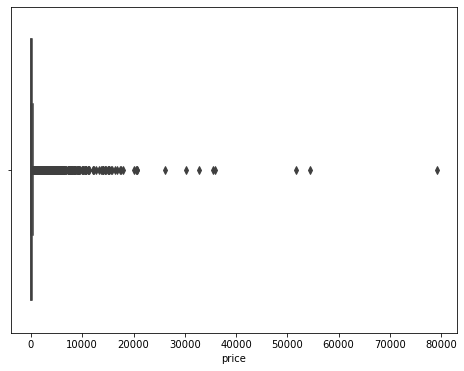

In [19]:
plt.figure(figsize =(8,6)) 
sns.boxplot(stat['price'])

C:\Users\dm199\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_carat'>

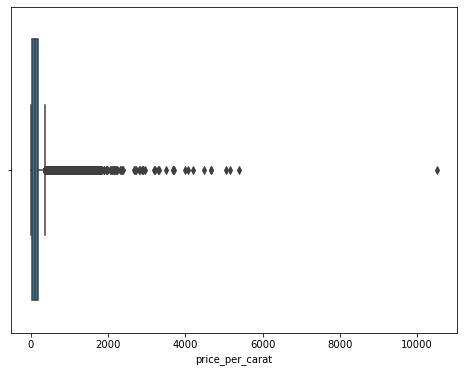

In [20]:
plt.figure(figsize =(8,6)) # work with outliers
sns.boxplot(stat['price_per_carat'])

In [21]:
df.columns

Index(['fluor', 'symmetry', 'platform', 'shape', 'color', 'clarity', 'cut',
       'polish', 'id', 'date', 'price', 'carat', 'price_per_carat', 'z', 'x',
       'depth_perc', 'y'],
      dtype='object')

In [22]:
stat

,price,carat,price_per_carat,z,x,depth_perc,y
id,,,,,,,
19423,334.863156,0.0,318.916742,0.0,0.0,0.404145,0.026835
19449,494.974747,0.0,423.054916,0.0,0.0,0.000000,0.000000
19501,831.384388,0.0,415.692194,0.0,0.0,0.346410,0.027436
19504,0.000000,0.0,0.000000,0.0,0.0,0.212132,0.014213
19505,813.172798,0.0,404.564074,0.0,0.0,0.353553,0.028602
...,...,...,...,...,...,...,...
15159825,601.040764,0.0,601.040764,0.0,0.0,0.000000,0.000000
15159829,466.690476,0.0,457.540514,0.0,0.0,0.000000,0.000000
15159840,657.609307,0.0,730.681721,0.0,0.0,0.000000,0.000000


C:\Users\dm199\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_carat'>

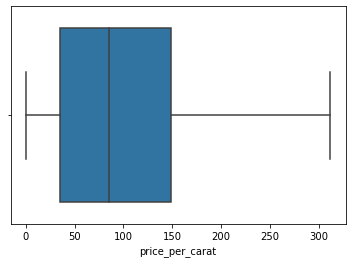

In [23]:
sns.boxplot(stat[stat['price_per_carat'] < 312]['price_per_carat'])

In [24]:
filter_ = stat[stat['price_per_carat'] < 312].index

In [25]:
df_three_no_anomalys = df_three[df_three['id'].isin(filter_)]
df_three_no_anomalys.sort_values(by=['id','date'])


,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
22,NONE,VG,jamesallen,EM SQ,E,VS2,NaN,EX,19504,202205,23140.0,2.01,11512.44,7.03,6.70,73.0,4.89100
23,NONE,VG,jamesallen,EM SQ,E,VS2,NaN,EX,19504,202206,23140.0,2.01,11512.44,7.03,6.70,73.3,4.91110
40,NONE,VG,jamesallen,RAD,K,VS2,NaN,EX,19585,202205,2100.0,0.92,2282.61,5.99,5.23,70.0,3.66100
43,NONE,VG,jamesallen,RAD,K,VS2,NaN,EX,19585,202207,2180.0,0.92,2369.57,5.99,5.23,70.2,3.67146
44,NONE,VG,jamesallen,RAD,G,VS1,NaN,VG,19599,202205,5410.0,1.00,5410.00,6.20,5.27,70.0,3.68900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418754,NONE,EX,jamesallen,RD,F,SI1,EX,EX,15159434,202207,7890.0,1.01,7811.88,6.37,6.41,62.9,4.03189
418769,NONE,G,jamesallen,EM,K,SI1,NaN,EX,15159585,202206,1940.0,1.03,1883.50,6.40,5.11,68.6,3.50546
418770,NONE,G,jamesallen,EM,K,SI1,NaN,EX,15159585,202207,2020.0,1.03,1961.17,6.40,5.11,68.6,3.50546
418860,NONE,EX,jamesallen,RD,H,VS1,EX,EX,15159932,202206,16370.0,1.50,10913.33,7.27,7.31,62.8,4.59068


In [26]:
df_three_no_anomalys = df_three_no_anomalys.groupby('id').agg('last').reset_index()

In [27]:
df_one

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
189202,NONE,EX,jamesallen,PS,D,SI2,NaN,EX,14224443,202205,9120.0,1.51,6039.74,10.67,6.23,59.0,3.67570
76462,NONE,VG,jamesallen,EM,K,SI2,NaN,VG,12902293,202205,1390.0,0.91,1527.47,6.30,4.58,71.0,3.25180
72397,NONE,VG,jamesallen,PS,J,VS1,NaN,VG,12771762,202207,15990.0,2.27,7044.05,11.66,7.26,62.2,4.51572
269475,MED,EX,jamesallen,RD,J,SI2,EX,EX,14584509,202205,3700.0,1.01,3663.37,6.37,6.42,62.0,3.98040
321928,NONE,EX,jamesallen,RD,G,SI1,EX,EX,14773748,202206,7170.0,1.00,7170.00,6.30,6.35,63.7,4.04495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438848,NONE,EX,jamesallen,RD,F,IF,EX,EX,15296246,202207,20250.0,1.30,15576.92,7.03,7.08,60.8,4.30464
387911,NONE,EX,jamesallen,RD,I,VS2,EX,EX,15037555,202206,8980.0,1.35,6651.85,7.05,7.09,61.7,4.37453
165589,STG,G,jamesallen,CUSH,H,SI2,VG,VG,14102502,202205,2970.0,1.01,2940.59,6.12,5.31,71.0,3.77010
141550,NONE,EX,jamesallen,RD,J,SI2,EX,EX,13932645,202205,11570.0,1.52,7611.84,7.36,7.39,61.0,4.50790


In [28]:
df = pd.concat([df_one, df_three_no_anomalys]).reset_index(drop=True) # соединяем результат
df

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
0,NONE,EX,jamesallen,PS,D,SI2,NaN,EX,14224443,202205,9120.0,1.51,6039.74,10.67,6.23,59.0,3.675700
1,NONE,VG,jamesallen,EM,K,SI2,NaN,VG,12902293,202205,1390.0,0.91,1527.47,6.30,4.58,71.0,3.251800
2,NONE,VG,jamesallen,PS,J,VS1,NaN,VG,12771762,202207,15990.0,2.27,7044.05,11.66,7.26,62.2,4.515720
3,MED,EX,jamesallen,RD,J,SI2,EX,EX,14584509,202205,3700.0,1.01,3663.37,6.37,6.42,62.0,3.980400
4,NONE,EX,jamesallen,RD,G,SI1,EX,EX,14773748,202206,7170.0,1.00,7170.00,6.30,6.35,63.7,4.044950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158410,FNT,EX,jamesallen,CUSH,D,VS1,VG,EX,15159257,202206,19560.0,2.01,9731.34,7.21,6.75,69.3,4.677750
158411,NONE,EX,jamesallen,RAD,G,SI1,None,EX,15159426,202207,6080.0,1.20,5066.67,6.87,5.45,69.7,3.798649
158412,NONE,EX,jamesallen,RD,F,SI1,EX,EX,15159434,202206,7580.0,1.01,7504.95,6.37,6.41,62.9,4.031890
158413,NONE,G,jamesallen,EM,K,SI1,None,EX,15159585,202206,1940.0,1.03,1883.50,6.40,5.11,68.6,3.505460


Цены на бриллианты достаточно сильно меняются, попробуем вычислить коэффициент инфляции и привести цены к последнему месяцу. Стоит учесть, что цены на все бриллианты не изменяются синхронно, то есть изменение в определенных группах может быть разным.

*Определим эти группы и рассчитаем коэффициенты инфляции для каждой из них. Подправим цены на эти коэффициенты и создадим новую переменную.*

In [29]:
categories = ['carat'] #определим по каким группам отпределять инфляцию (к примеру можно добавить каратную группу)

df_index = df.groupby(['date'] + categories)[['price_per_carat']]\
             .mean()\
             .reset_index() # индекс цен

date_max = df_index.date.max()


df_index = df_index.merge(df_index.query('date == @date_max')[categories + ['price_per_carat']]\
                          .rename(columns={'price_per_carat': 'price_per_carat_max'}), 
                          on=categories, how='outer') # сопоставляем группы с максимальной датой


In [30]:
df_index

,date,carat,price_per_carat,price_per_carat_max
0,202205,0.81,3617.921564,3585.986054
1,202206,0.81,3522.229355,3585.986054
2,202207,0.81,3585.986054,3585.986054
3,202205,0.82,3559.462153,3652.817655
4,202206,0.82,3611.090566,3652.817655
...,...,...,...,...
1330,202207,10.82,16146.030000,16146.030000
1331,202207,12.12,31858.910000,31858.910000
1332,202207,15.01,88944.700000,88944.700000
1333,202207,18.38,118130.030000,118130.030000


In [31]:
df_index['inflation'] = df_index['price_per_carat_max'] / df_index.price_per_carat # вычисляем инфляцию

df_with_inf = df.merge(df_index[['date'] + categories + ['inflation']], 
                        on=['date'] + categories, how='left') # соединяем все в одной таблице

In [32]:
df_with_inf

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y,inflation
0,NONE,EX,jamesallen,PS,D,SI2,NaN,EX,14224443,202205,9120.0,1.51,6039.74,10.67,6.23,59.0,3.675700,1.044596
1,NONE,VG,jamesallen,EM,K,SI2,NaN,VG,12902293,202205,1390.0,0.91,1527.47,6.30,4.58,71.0,3.251800,1.062844
2,NONE,VG,jamesallen,PS,J,VS1,NaN,VG,12771762,202207,15990.0,2.27,7044.05,11.66,7.26,62.2,4.515720,1.000000
3,MED,EX,jamesallen,RD,J,SI2,EX,EX,14584509,202205,3700.0,1.01,3663.37,6.37,6.42,62.0,3.980400,1.061260
4,NONE,EX,jamesallen,RD,G,SI1,EX,EX,14773748,202206,7170.0,1.00,7170.00,6.30,6.35,63.7,4.044950,1.041619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158410,FNT,EX,jamesallen,CUSH,D,VS1,VG,EX,15159257,202206,19560.0,2.01,9731.34,7.21,6.75,69.3,4.677750,1.035082
158411,NONE,EX,jamesallen,RAD,G,SI1,None,EX,15159426,202207,6080.0,1.20,5066.67,6.87,5.45,69.7,3.798649,1.000000
158412,NONE,EX,jamesallen,RD,F,SI1,EX,EX,15159434,202206,7580.0,1.01,7504.95,6.37,6.41,62.9,4.031890,1.066097
158413,NONE,G,jamesallen,EM,K,SI1,None,EX,15159585,202206,1940.0,1.03,1883.50,6.40,5.11,68.6,3.505460,1.045027


In [33]:
df_with_inf['price with inflation'] = df_with_inf['price'] * df_with_inf['inflation'] # prices with inflation

In [34]:
df_with_inf

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y,inflation,price with inflation
0,NONE,EX,jamesallen,PS,D,SI2,NaN,EX,14224443,202205,9120.0,1.51,6039.74,10.67,6.23,59.0,3.675700,1.044596,9526.712497
1,NONE,VG,jamesallen,EM,K,SI2,NaN,VG,12902293,202205,1390.0,0.91,1527.47,6.30,4.58,71.0,3.251800,1.062844,1477.353015
2,NONE,VG,jamesallen,PS,J,VS1,NaN,VG,12771762,202207,15990.0,2.27,7044.05,11.66,7.26,62.2,4.515720,1.000000,15990.000000
3,MED,EX,jamesallen,RD,J,SI2,EX,EX,14584509,202205,3700.0,1.01,3663.37,6.37,6.42,62.0,3.980400,1.061260,3926.661701
4,NONE,EX,jamesallen,RD,G,SI1,EX,EX,14773748,202206,7170.0,1.00,7170.00,6.30,6.35,63.7,4.044950,1.041619,7468.408507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158410,FNT,EX,jamesallen,CUSH,D,VS1,VG,EX,15159257,202206,19560.0,2.01,9731.34,7.21,6.75,69.3,4.677750,1.035082,20246.201670
158411,NONE,EX,jamesallen,RAD,G,SI1,None,EX,15159426,202207,6080.0,1.20,5066.67,6.87,5.45,69.7,3.798649,1.000000,6080.000000
158412,NONE,EX,jamesallen,RD,F,SI1,EX,EX,15159434,202206,7580.0,1.01,7504.95,6.37,6.41,62.9,4.031890,1.066097,8081.018891
158413,NONE,G,jamesallen,EM,K,SI1,None,EX,15159585,202206,1940.0,1.03,1883.50,6.40,5.11,68.6,3.505460,1.045027,2027.351840


Удаляем значения признака fluor, которые не позволяют построить модель

In [35]:
df_with_inf['fluor'].value_counts()

NONE    101554
FNT      30641
MED      15740
STG      10473
Name: fluor, dtype: int64

In [36]:
df_with_inf['fluor'].unique()

array(['NONE', 'MED', 'FNT', 'STG', nan, None], dtype=object)

In [37]:
df_with_inf[df_with_inf['fluor'] == None]


,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y,inflation,price with inflation


In [38]:
df_with_inf[df_with_inf['fluor'].isna()]

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y,inflation,price with inflation
12536,NaN,EX,jamesallen,RD,G,SI1,EX,EX,14787720,202206,10050.0,1.29,7790.70,6.97,6.93,62.5,4.33125,1.168060,11738.999033
73574,NaN,EX,jamesallen,CUSH,J,VS2,VG,EX,3345704,202206,3720.0,1.13,3292.04,5.79,5.76,74.6,4.29696,0.938844,3492.500792
86938,NaN,VG,jamesallen,PS,H,SI2,NaN,VG,13412215,202206,4210.0,0.98,4295.92,8.09,5.67,61.9,3.50973,1.014673,4271.773885
124647,None,VG,jamesallen,OV,H,SI2,None,VG,13262095,202205,4170.0,0.97,4298.97,7.75,5.42,63.0,3.41460,1.149235,4792.311700
124648,None,VG,jamesallen,OV,D,SI2,None,EX,13262100,202205,5080.0,0.96,5291.67,7.96,5.35,62.0,3.31700,1.153200,5858.254603
124660,None,EX,jamesallen,EM,F,SI1,None,EX,13264995,202205,14480.0,1.70,8517.65,7.87,5.60,68.0,3.80800,1.031957,14942.742989
125716,None,VG,jamesallen,PS,G,SI2,None,VG,13412217,202206,4450.0,0.96,4635.42,8.60,5.51,61.3,3.37763,1.134079,5046.651083


In [39]:
df_with_inf['fluor'] = df_with_inf['fluor'].fillna('NONE')

In [40]:
df_with_inf['fluor'].unique()

array(['NONE', 'MED', 'FNT', 'STG'], dtype=object)

In [41]:
df_with_inf.isna().sum()

fluor                       0
symmetry                    0
platform                    0
shape                       0
color                       0
clarity                     0
cut                     51463
polish                      0
id                          0
date                        0
price                       0
carat                       0
price_per_carat             0
z                           0
x                           0
depth_perc                  0
y                           0
inflation                 172
price with inflation      172
dtype: int64

In [42]:
df_with_inf['cut'].unique()

array([nan, 'EX', 'G', 'VG', None], dtype=object)

In [43]:
df_with_inf['inflation'] = df_with_inf['inflation'].fillna(df_with_inf['inflation'].mean()) #fil na with mean value
df_with_inf['price with inflation'] = df_with_inf['price with inflation'].fillna(df_with_inf['price with inflation'].mean())

In [44]:
df_with_inf.isna().sum()

fluor                       0
symmetry                    0
platform                    0
shape                       0
color                       0
clarity                     0
cut                     51463
polish                      0
id                          0
date                        0
price                       0
carat                       0
price_per_carat             0
z                           0
x                           0
depth_perc                  0
y                           0
inflation                   0
price with inflation        0
dtype: int64

###  Модель

In [45]:
import sklearn
print(sklearn.__version__)

0.24.2


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error


X = df_with_inf.drop(columns=["price_per_carat", "price" ]) # удалим колонку price чтоб нельзя было восстановить ответ, а обученные модели были бы более содержательными
y = df_with_inf["price_per_carat"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

In [47]:
! pip install category_encoders

In [48]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

from typing import Tuple, List


def OHE(df: pd.DataFrame, columns: List[str]) -> Tuple[pd.DataFrame, List[str]]:
    """
    Вместо это функции можно использовать и функционал pandas
    """
    index = df.index
    one = OneHotEncoder(sparse=False, categories='auto')
    ohe = one.fit_transform(df[columns])
    col_names = one.get_feature_names(input_features = columns)
    df = df.drop(columns, axis=1)
    df = df.reset_index(drop=True)
    df = pd.concat([df, pd.DataFrame(ohe, columns=col_names)], axis = 1)
    df = df.set_index(index)
    return (df, col_names)

scaler = StandardScaler() # на тесте делаем только transform

In [49]:
X_train.columns

Index(['fluor', 'symmetry', 'platform', 'shape', 'color', 'clarity', 'cut',
       'polish', 'id', 'date', 'carat', 'z', 'x', 'depth_perc', 'y',
       'inflation', 'price with inflation'],
      dtype='object')

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126732 entries, 66717 to 65689
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   fluor                 126732 non-null  object 
 1   symmetry              126732 non-null  object 
 2   platform              126732 non-null  object 
 3   shape                 126732 non-null  object 
 4   color                 126732 non-null  object 
 5   clarity               126732 non-null  object 
 6   cut                   85605 non-null   object 
 7   polish                126732 non-null  object 
 8   id                    126732 non-null  int64  
 9   date                  126732 non-null  int64  
 10  carat                 126732 non-null  float64
 11  z                     126732 non-null  float64
 12  x                     126732 non-null  float64
 13  depth_perc            126732 non-null  float64
 14  y                     126732 non-null  float64
 1

In [51]:
#label encoder and linear regression
label_enc = LabelEncoder()


In [52]:
X_train.columns

Index(['fluor', 'symmetry', 'platform', 'shape', 'color', 'clarity', 'cut',
       'polish', 'id', 'date', 'carat', 'z', 'x', 'depth_perc', 'y',
       'inflation', 'price with inflation'],
      dtype='object')

In [53]:
X_train[['fluor', 'symmetry', 'platform', 'shape', 'color', 'clarity', 'cut',
       'polish']] = X_train[['fluor', 'symmetry', 'platform', 'shape', 'color', 'clarity', 'cut',
       'polish']].apply(label_enc.fit_transform)

C:\Users\dm199\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
X_train

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,carat,z,x,depth_perc,y,inflation,price with inflation
66717,0,0,0,9,2,5,0,0,14276075,202207,1.01,6.34,6.39,63.3,4.044870,1.000000,9000.000000
76452,2,1,0,6,2,1,1,2,15319432,202207,1.00,5.38,5.36,77.2,4.137920,1.000000,2770.000000
20010,2,0,0,9,1,3,0,0,14465871,202205,1.00,6.32,6.37,63.0,4.013100,1.057686,8524.945731
79440,2,0,0,9,1,4,0,0,15281294,202207,1.70,7.53,7.59,62.8,4.766520,1.000000,13010.000000
28123,2,0,0,1,5,7,4,0,10562829,202206,1.51,8.38,5.32,67.4,3.585680,1.035859,10161.778818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144628,0,0,0,8,5,6,3,0,14574159,202207,1.71,7.41,5.83,71.2,4.150960,1.000000,7370.000000
58266,0,0,0,9,2,6,0,0,13881201,202205,2.01,7.98,8.03,62.0,4.978600,1.039492,32567.270002
81891,2,0,0,3,2,4,4,0,14569692,202206,3.00,8.85,10.10,57.3,5.787301,1.030109,36507.061183
25324,0,0,0,5,4,6,4,0,15101361,202206,1.50,8.27,6.27,69.0,4.326300,1.022858,10525.210805


In [55]:
X_valid[['fluor', 'symmetry', 'platform', 'shape', 'color', 'clarity', 'cut',
       'polish']] = X_valid[['fluor', 'symmetry', 'platform', 'shape', 'color', 'clarity', 'cut',
       'polish']].apply(label_enc.fit_transform)

C:\Users\dm199\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [56]:
X_valid

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,carat,z,x,depth_perc,y,inflation,price with inflation
75043,2,0,0,9,3,7,0,0,14251802,202206,1.00,6.43,6.47,60.9,3.94023,1.041619,11572.387520
107346,0,3,0,0,1,3,2,0,14300128,202205,1.50,7.19,6.30,66.0,4.15800,1.028155,10014.225463
74867,2,0,0,9,0,6,0,0,14237721,202205,1.80,7.67,7.73,62.0,4.79260,0.996621,28294.071952
95981,2,0,0,9,5,3,0,0,13939805,202205,0.84,5.98,6.02,62.0,3.73240,1.083361,3250.083821
38027,0,0,0,0,7,3,2,0,14667430,202207,1.00,6.34,5.27,69.1,3.64157,1.000000,2260.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98195,2,0,0,9,3,5,0,0,14811171,202206,1.01,6.40,6.44,62.5,4.02500,1.066097,10063.960202
122769,2,3,0,1,0,8,3,0,12956839,202206,1.20,7.02,5.31,64.9,3.44619,1.078304,11020.265692
130087,1,0,0,7,6,3,3,0,13907179,202207,1.00,8.88,5.41,63.4,3.42994,1.000000,2290.000000
40599,2,0,0,1,7,7,4,0,14422442,202205,1.50,7.73,5.45,67.0,3.65150,1.028155,8184.110337


In [57]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()



In [58]:
X_valid.isna().sum()

fluor                   0
symmetry                0
platform                0
shape                   0
color                   0
clarity                 0
cut                     0
polish                  0
id                      0
date                    0
carat                   0
z                       0
x                       0
depth_perc              0
y                       0
inflation               0
price with inflation    0
dtype: int64

In [59]:
linear.fit(X_train, y_train)

LinearRegression()

In [60]:
base_y_pred = linear.predict(X_valid)


In [61]:
print(f"TEST: Base mean_absolute_error -- {mean_absolute_error(y_valid, base_y_pred)}")
print(f"TEST: Base mean_squared_error -- {mean_squared_error(y_valid, base_y_pred)}")
print(f"TEST: Base r2_score-- {r2_score(y_valid, base_y_pred)}")
print(f"TEST: Base mean_absolute_percentage_error -- {mean_absolute_percentage_error(y_valid, base_y_pred)}")

TEST: Base mean_absolute_error -- 1095.7771966680962
TEST: Base mean_squared_error -- 4351894.611519374
TEST: Base r2_score-- 0.770802108647163
TEST: Base mean_absolute_percentage_error -- 0.18329904943493885


## OHE

In [62]:
X = df_with_inf.drop(columns=["price_per_carat", 'price']) #удалим колонку price чтоб нельзя было восстановить ответ, а обученные модели были бы более содержател
y = df_with_inf["price_per_carat"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

In [63]:
X_train = OHE(X_train, ['fluor', 'symmetry', 'platform', 'shape', 'color', 'clarity', 'cut',
       'polish'])

In [64]:
X_valid = OHE(X_valid, ['fluor', 'symmetry', 'platform', 'shape', 'color', 'clarity', 'cut',
       'polish'])

In [65]:
X_valid[0].columns

Index(['id', 'date', 'carat', 'z', 'x', 'depth_perc', 'y', 'inflation',
       'price with inflation', 'fluor_FNT', 'fluor_MED', 'fluor_NONE',
       'fluor_STG', 'symmetry_EX', 'symmetry_G', 'symmetry_No', 'symmetry_VG',
       'platform_jamesallen', 'shape_CUSH', 'shape_EM', 'shape_EM SQ',
       'shape_HS', 'shape_MQ', 'shape_OV', 'shape_PR', 'shape_PS', 'shape_RAD',
       'shape_RD', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'color_K', 'color_L', 'color_M', 'clarity_FL',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'cut_EX', 'cut_G',
       'cut_VG', 'cut_None', 'cut_nan', 'polish_EX', 'polish_G', 'polish_VG'],
      dtype='object')

In [66]:
X_train[0].columns

Index(['id', 'date', 'carat', 'z', 'x', 'depth_perc', 'y', 'inflation',
       'price with inflation', 'fluor_FNT', 'fluor_MED', 'fluor_NONE',
       'fluor_STG', 'symmetry_EX', 'symmetry_G', 'symmetry_No', 'symmetry_VG',
       'platform_jamesallen', 'shape_CUSH', 'shape_EM', 'shape_EM SQ',
       'shape_HS', 'shape_MQ', 'shape_OV', 'shape_PR', 'shape_PS', 'shape_RAD',
       'shape_RD', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'color_K', 'color_L', 'color_M', 'clarity_FL',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'cut_EX', 'cut_G',
       'cut_VG', 'cut_None', 'cut_nan', 'polish_EX', 'polish_G', 'polish_VG'],
      dtype='object')

In [67]:
scaled_X_train = scaler.fit_transform(X_train[0])

In [68]:
scaled_X_valid = scaler.transform(X_valid[0])

In [69]:
linear.fit(scaled_X_train, y_train)

LinearRegression()

In [70]:
ohe_linear_y_perd = linear.predict(scaled_X_valid)

In [71]:
print(f"TEST: mean_absolute_error -- {mean_absolute_error(y_valid, ohe_linear_y_perd)}")
print(f"TEST: mean_squared_error -- {mean_squared_error(y_valid, ohe_linear_y_perd)}")
print(f"TEST: r2_score-- {r2_score(y_valid, ohe_linear_y_perd)}")
print(f"TEST: mean_absolute_percentage_error -- {mean_absolute_percentage_error(y_valid,ohe_linear_y_perd)}")

TEST: mean_absolute_error -- 778.017955028737
TEST: mean_squared_error -- 2976779.6679061274
TEST: r2_score-- 0.8432242313267136
TEST: mean_absolute_percentage_error -- 0.134585351353342


## Suggested model describes 84 % of the variance. Good result.


## TargetEncoder

In [72]:
t_encoder = TargetEncoder()
X = df_with_inf.drop(columns=["price_per_carat", 'price']) #удалим колонку price чтоб нельзя было восстановить ответ, а обученные модели были бы более содержател
y = df_with_inf["price_per_carat"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

In [73]:
X_train = t_encoder.fit_transform(X_train, y_train)

In [74]:
X_valid = t_encoder.transform(X_valid, y_valid)

In [75]:
scaled_X_train = scaler.fit_transform(X_train)

In [76]:
scaled_X_valid = scaler.transform(X_valid)

In [77]:
linear.fit(scaled_X_train, y_train)

LinearRegression()

In [78]:
te_linear_y_perd = linear.predict(scaled_X_valid)

In [79]:
print(f"TEST:  mean_absolute_error -- {mean_absolute_error(y_valid, te_linear_y_perd)}")
print(f"TEST:  mean_squared_error -- {mean_squared_error(y_valid, te_linear_y_perd)}")
print(f"TEST:  r2_score-- {r2_score(y_valid, te_linear_y_perd)}")
print(f"TEST:  mean_absolute_percentage_error -- {mean_absolute_percentage_error(y_valid,te_linear_y_perd)}")

TEST:  mean_absolute_error -- 900.922857739409
TEST:  mean_squared_error -- 3409954.9453499736
TEST:  r2_score-- 0.8204105216579386
TEST:  mean_absolute_percentage_error -- 0.15218633934344433


## Suggested model describes 82 % of the variance. 

Сравните работу выбранной вами линейной модели с KNN

In [80]:
X = df_with_inf.drop(columns=["price_per_carat", 'price']) #удалим колонку price чтоб нельзя было восстановить ответ, а обученные модели были бы более содержател
y = df_with_inf["price_per_carat"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

In [81]:
X_train = OHE(X_train, ['fluor', 'symmetry', 'platform', 'shape', 'color', 'clarity', 'cut',
       'polish'])

X_valid = OHE(X_valid, ['fluor', 'symmetry', 'platform', 'shape', 'color', 'clarity', 'cut',
       'polish'])

scaled_X_train = scaler.fit_transform(X_train[0])

scaled_X_valid = scaler.transform(X_valid[0])

In [82]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3, n_jobs = 4)
knn.fit(scaled_X_train, y_train)

KNeighborsRegressor(n_jobs=4, n_neighbors=3)

In [83]:
knn_y_pred = knn.predict(scaled_X_valid)

In [84]:
print(f"TEST:  mean_absolute_error -- {mean_absolute_error(y_valid, knn_y_pred)}")
print(f"TEST:  mean_squared_error -- {mean_squared_error(y_valid, knn_y_pred)}")
print(f"TEST:  r2_score-- {r2_score(y_valid, knn_y_pred)}")
print(f"TEST:  mean_absolute_percentage_error -- {mean_absolute_percentage_error(y_valid,knn_y_pred)}")

TEST:  mean_absolute_error -- 801.5614394680638
TEST:  mean_squared_error -- 4431928.895202901
TEST:  r2_score-- 0.7665870044928381
TEST:  mean_absolute_percentage_error -- 0.12776210324602322


## Suggested KNN model describes 77 % of the variance and MAPE 12.7%

## Выводы
- Кодирования признаков с помощью OHE и использование линеной модели позволило получить Коэффициент детерминации 88.5% и среднюю абсолютную ошибку в процентах равной 13%
- LabelEncoder и линейная модель: Коэффициент детерминации 77% и средняя абсолютная ошибка в процентах  18%
- Использование TargetEncoder и линейной модели  позволило получить Коэффициент детерминации 82% и среднюю абсолютную ошибку в процентах равной 15%, что немного хуже чем OHE
- Алгоритм KNN показла следуюший результат:  Коэффициент детерминации 76% и средняя абсолютная ошибка в процентах 12,7%

OHE с линейной моделью является лучшим вараиантом для предсказания цены за карат на бриллианты из рассмотренных вариантов

## Классификация

Загрузим датасет bodyPerformance

Описание:

https://www.kaggle.com/datasets/kukuroo3/body-performance-data

In [85]:
df = pd.read_csv(r"C:\Users\dm199\Downloads\bodyPerformance - bodyPerformance.csv") #укажите свой путь

In [86]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [87]:
df['gender'].value_counts()

M    8467
F    4926
Name: gender, dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


### Определение гендера

Построим модель, которая будет определять гендер.

Для этого определим две метрики качества, на которые будем смотреть.
После чего преобразуем категориальные переменные и построем модель бинарной классификации на основе линейного классификатора и сравним с KNN.



## Метрика качества 
- Accuracy - доля правильных ответов алгоритма. Нам здесь не принципиально учитывать ошибку первого и второго родов 
- AUC-ROC  Критерий AUC-ROC устойчив к несбалансированным классам и показывает соотношение между долей объектов верно классифицированных как несущие признак и долей объектов, не несущих признака, ошибочно классифицированных как несущие признак. чем больше, тем лучше


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score 
from sklearn.metrics import roc_curve, auc

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = df.drop(columns=["gender"])
y = df["gender"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

scaler = StandardScaler()
encoder = OneHotEncoder()

In [91]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_valid = pd.get_dummies(X_valid, drop_first=True)
X_valid

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class_B,class_C,class_D
9182,30.0,178.0,71.6,24.8,90.0,132.0,36.1,27.4,30.0,198.0,1,0,0
9982,22.0,177.9,81.2,21.5,93.0,132.0,44.1,11.5,48.0,249.0,0,1,0
12857,32.0,172.8,74.6,14.5,79.0,144.0,55.3,16.1,59.0,248.0,0,0,0
4295,63.0,154.3,45.6,17.9,70.0,120.0,19.3,13.6,7.0,129.0,0,1,0
8381,60.0,172.2,80.0,19.6,83.0,158.0,43.2,16.1,30.0,180.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,44.0,174.7,79.6,22.7,81.0,110.0,52.4,1.2,21.0,163.0,0,0,1
825,42.0,158.1,62.1,29.1,72.0,130.0,30.4,20.1,32.0,146.0,1,0,0
9428,21.0,178.6,72.8,22.2,72.0,111.0,38.1,20.7,37.0,178.0,0,0,1
4629,31.0,180.5,90.0,16.8,98.0,149.0,52.8,17.1,51.0,250.0,1,0,0


In [92]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_valid = scaler.transform(X_valid)

In [93]:
lr = LogisticRegression()

In [94]:
lr.fit(scaled_X_train,y_train)

LogisticRegression()

In [95]:
y_pred_lr = lr.predict(scaled_X_valid)

In [96]:
confusion_matrix(y_valid, y_pred_lr)

array([[ 955,   13],
       [  12, 1699]], dtype=int64)

In [97]:
y_pred_lr

array(['M', 'M', 'M', ..., 'M', 'M', 'F'], dtype=object)

In [98]:
y_valid

9182     F
9982     M
12857    M
4295     F
8381     M
        ..
8613     M
825      F
9428     M
4629     M
7608     F
Name: gender, Length: 2679, dtype: object

In [99]:
print(f"TEST:  Accuracy -- {accuracy_score(y_valid, y_pred_lr)}")


TEST:  Accuracy -- 0.9906681597611049


In [100]:
prob = lr.predict_proba(scaled_X_valid)

In [101]:
print(f"TEST:  ROC-AUC -- {roc_auc_score(y_valid,prob[:, 1])}")

TEST:  ROC-AUC -- 0.9971151663277481


## ROC-AUC 99.7%, Accuracy 99%  Extremly good

In [102]:
X = df.drop(columns=["gender"])
y = df["gender"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

scaler = StandardScaler()
X_train = pd.get_dummies(X_train, drop_first=True)
X_valid = pd.get_dummies(X_valid, drop_first=True)

In [103]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_valid = scaler.transform(X_valid)

In [104]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [105]:
knn_y_pred = knn.predict(scaled_X_valid)

In [106]:
print(f"TEST:  Accuracy -- {accuracy_score(y_valid, knn_y_pred)}")


TEST:  Accuracy -- 0.9891750653228817


In [107]:
prob = knn.predict_proba(scaled_X_valid)
print(f"TEST:  ROC-AUC -- {roc_auc_score(y_valid,prob[:, 1])}")

TEST:  ROC-AUC -- 0.9952715414599747


## ROC-AUC 99.5%, Accuracy 98.9%  Extremly good result.


## Выводы
- KNN ROC-AUC 99.5%, Accuracy 98.9%
- lr ROC-AUC 99.7%, Accuracy 99%
Алгоритм на основе логистической регрессии показал немного лучший результат


### Определение класса

Теперь опробуем построить модель, которая будет предсказывать class физической формы.

Для этого определите метрики качества для задачи мультиклассификации.

Построим модель мультиклассовой классификации на основе линейного классификатора и сравним с KNN.

## Метрика качества 
- Accuracy - доля правильных ответов алгоритма. Чем больше, тем лучше легко интепретируется.
- confusion_matrix наглядная,  интерпретируемая метрика, покажет где ошибался алгоритм

In [108]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [109]:
X = df.drop(columns=["class"]) # укажите новый таргет
y = df["class"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

In [110]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_valid = pd.get_dummies(X_valid, drop_first=True)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_valid = scaler.transform(X_valid)

In [111]:
lr.fit(scaled_X_train, y_train)

LogisticRegression()

In [112]:
y_pred_lr_class = lr.predict(scaled_X_valid)

In [113]:
print(f"TEST:  Accuracy -- {accuracy_score(y_valid, y_pred_lr_class)}")


TEST:  Accuracy -- 0.6151549085479656


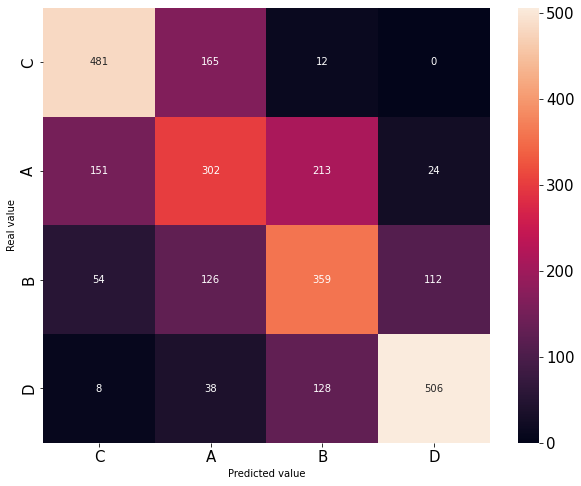

In [114]:
mp_mtx = confusion_matrix(y_valid, y_pred_lr_class)
fig = plt.figure(figsize=(10,8))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=df["class"].unique(), 
            yticklabels=df["class"].unique())
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.show()

### LogRegression  Accuracy 61.5% , приемлимый результат предсказания D класса

# KNN

In [115]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [116]:
y_pred_knn_class = knn.predict(scaled_X_valid)

In [117]:
print(f"TEST:  Accuracy -- {accuracy_score(y_valid, y_pred_knn_class)}")


TEST:  Accuracy -- 0.5804404628592759


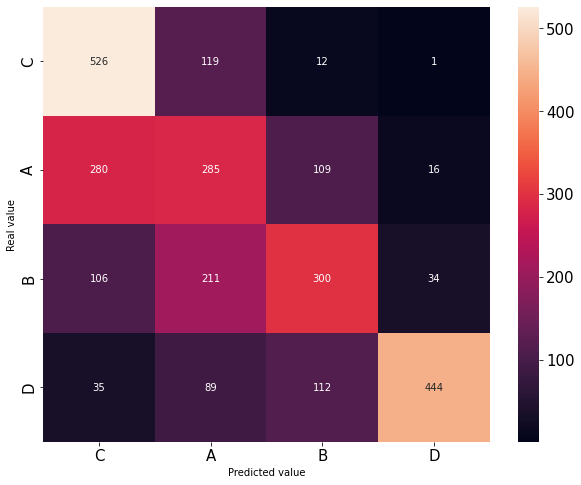

In [118]:
mp_mtx = confusion_matrix(y_valid, y_pred_knn_class)
fig = plt.figure(figsize=(10,8))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=df["class"].unique(), 
            yticklabels=df["class"].unique())
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.show() 

### KNN Accuracy 58%, приемлимый результат предсказания C класса

## Not very good result for KNN and LogRegression

## Вывод
- KNN Accuracy 58%, приемлимый результат предсказания C класса
-  LogRegression  Accuracy 61.5% , приемлимый результат предсказания D класса
